
#     EXAMPLE N°1 - CREDIT SCORING 2                 #


In [14]:
# Let's load our dataset and call it data
dataold=read.table('DATA_3.01_CREDIT.csv',sep=',',header=TRUE) # The function read.table enables us to read flat files such as .csv files
datanew=read.table('DATA_4.01_CREDIT2.csv',sep=',',header=TRUE) # The function read.table enables us to read flat files such as .csv files

In [15]:
# Now let's have a look at our variables and see some summary statistics
str(datanew) # The str() function shows the structure of your dataset and details the type of variables that it contains

'data.frame':	100 obs. of  10 variables:
 $ Income   : num  21.8 31.3 59.9 44.1 82.7 ...
 $ Rating   : int  355 289 365 352 536 165 287 298 332 494 ...
 $ Cards    : int  1 3 1 1 2 2 3 3 2 3 ...
 $ Age      : int  50 38 46 79 64 50 80 41 33 34 ...
 $ Education: int  17 7 13 11 13 14 8 14 6 18 ...
 $ Gender   : Factor w/ 2 levels " Male","Female": 1 2 2 1 2 2 1 2 1 2 ...
 $ Student  : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Married  : Factor w/ 2 levels "No","Yes": 2 1 2 2 2 2 2 2 1 2 ...
 $ Ethnicity: Factor w/ 3 levels "African American",..: 3 3 3 1 2 2 3 2 2 3 ...
 $ Balance  : int  580 172 295 414 905 0 70 0 681 885 ...


In [16]:
summary(datanew) # The summary() function provides for each variable in your dataset the minimum, mean, maximum and quartiles

     Income           Rating          Cards           Age       
 Min.   : 10.73   Min.   :112.0   Min.   :1.00   Min.   :23.00  
 1st Qu.: 21.00   1st Qu.:282.0   1st Qu.:2.00   1st Qu.:44.00  
 Median : 33.27   Median :363.0   Median :3.00   Median :57.50  
 Mean   : 48.71   Mean   :375.4   Mean   :2.75   Mean   :57.72  
 3rd Qu.: 61.80   3rd Qu.:448.0   3rd Qu.:3.00   3rd Qu.:71.00  
 Max.   :182.73   Max.   :982.0   Max.   :9.00   Max.   :98.00  
   Education        Gender   Student  Married             Ethnicity 
 Min.   : 6.00    Male :61   No :92   No :38   African American:21  
 1st Qu.:11.00   Female:39   Yes: 8   Yes:62   Asian           :21  
 Median :14.00                                 Caucasian       :58  
 Mean   :13.62                                                      
 3rd Qu.:16.00                                                      
 Max.   :19.00                                                      
    Balance    
 Min.   :   0  
 1st Qu.: 191  
 Median : 579 

In [17]:
linreg=lm(Rating~.,data=dataold) # Estimate a linear regression model of Rating as a function of everything else.
predcreditscore = predict(linreg,newdata=datanew,type="response") 

In [18]:
cor(linreg$fitted.values,dataold$Rating) # Computes the correlation between the fitted values and the actual ones

[1] 0.9867324

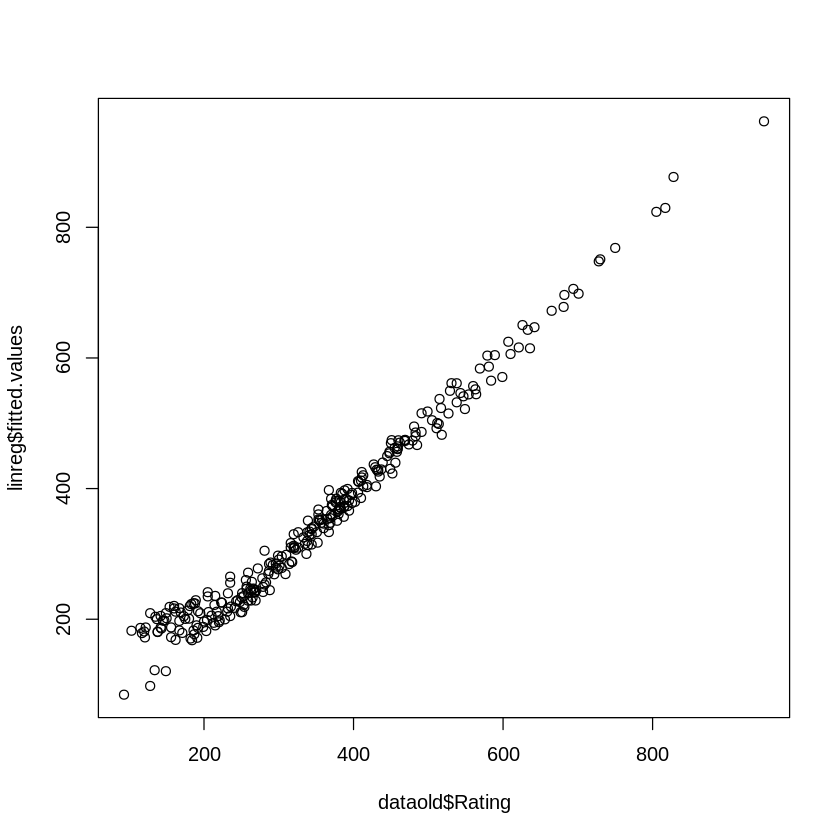

In [19]:
plot(dataold$Rating,linreg$fitted.values) # Plot the fitted values vs. the actual ones

In [20]:
cor(predcreditscore,datanew$Rating) # Computes the correlation between the fitted values and the actual ones

[1] 0.988097

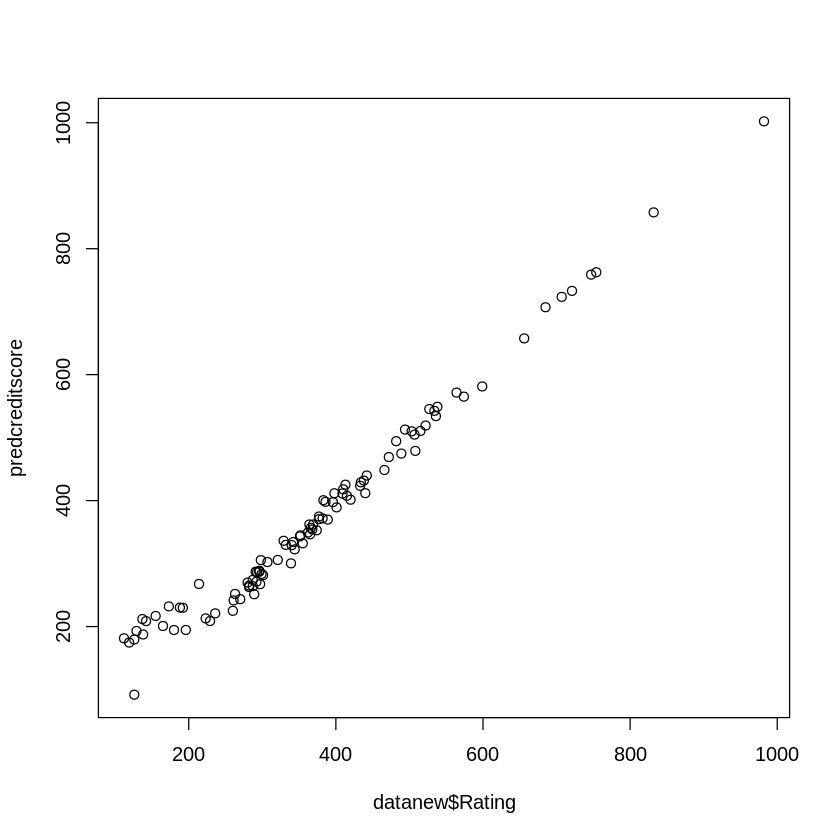

In [21]:
plot(datanew$Rating,predcreditscore) # Plot the fitted values vs. the actual ones

#        EXAMPLE N°2 - HR ANALYTICS 3                #

In [22]:
# Let's load our dataset
dataold=read.table('DATA_3.02_HR2.csv', header = T,sep=',') # The function read.table enables us to read flat files such as .csv files
datanew=read.table('DATA_4.02_HR3.csv', header = T,sep=',') # The new dataset on which we want to make the prediction


In [23]:
str(datanew) # The str() function shows the structure of your dataset and details the type of variables that it contains

'data.frame':	1000 obs. of  6 variables:
 $ S      : num  0.86 0.52 0.84 0.6 0.85 0.82 0.62 0.69 0.88 0.36 ...
 $ LPE    : num  0.69 0.98 0.6 0.65 0.57 0.61 0.53 0.8 0.68 0.65 ...
 $ NP     : int  4 4 5 3 3 4 3 3 5 5 ...
 $ ANH    : int  105 209 207 143 227 246 128 219 236 119 ...
 $ TIC    : int  4 2 2 2 2 3 4 3 3 5 ...
 $ Newborn: int  1 0 0 1 0 0 0 1 0 0 ...


In [24]:
summary(datanew) # The summary() function provides for each variable in your dataset the minimum, mean, maximum and quartiles

       S               LPE               NP             ANH       
 Min.   :0.1200   Min.   :0.3600   Min.   :2.000   Min.   : 96.0  
 1st Qu.:0.5300   1st Qu.:0.5900   1st Qu.:3.000   1st Qu.:160.0  
 Median :0.6800   Median :0.7200   Median :4.000   Median :201.0  
 Mean   :0.6626   Mean   :0.7193   Mean   :3.781   Mean   :200.2  
 3rd Qu.:0.8500   3rd Qu.:0.8600   3rd Qu.:4.000   3rd Qu.:241.0  
 Max.   :1.0000   Max.   :1.0000   Max.   :6.000   Max.   :287.0  
      TIC           Newborn     
 Min.   :2.000   Min.   :0.000  
 1st Qu.:2.000   1st Qu.:0.000  
 Median :3.000   Median :0.000  
 Mean   :3.103   Mean   :0.197  
 3rd Qu.:4.000   3rd Qu.:0.000  
 Max.   :6.000   Max.   :1.000  

In [25]:
logreg = glm(left ~ ., family=binomial(logit), data=dataold) # Estimate the drivers of attrition
probaToLeave=predict(logreg,newdata=datanew,type="response") # Make predictions on the out-of-sample data

In [26]:
predattrition = data.frame(probaToLeave) # Structure the prediction output in a table
View(predattrition) # View the predattrition dataframe

ERROR: Error in View(predattrition): ‘View()’ not yet supported in the Jupyter R kernel


In [27]:
predattrition$performance=datanew$LPE # Add a column to the predattrition dataframe containing the performance
View(predattrition) # View the predattrition dataframe

ERROR: Error in View(predattrition): ‘View()’ not yet supported in the Jupyter R kernel


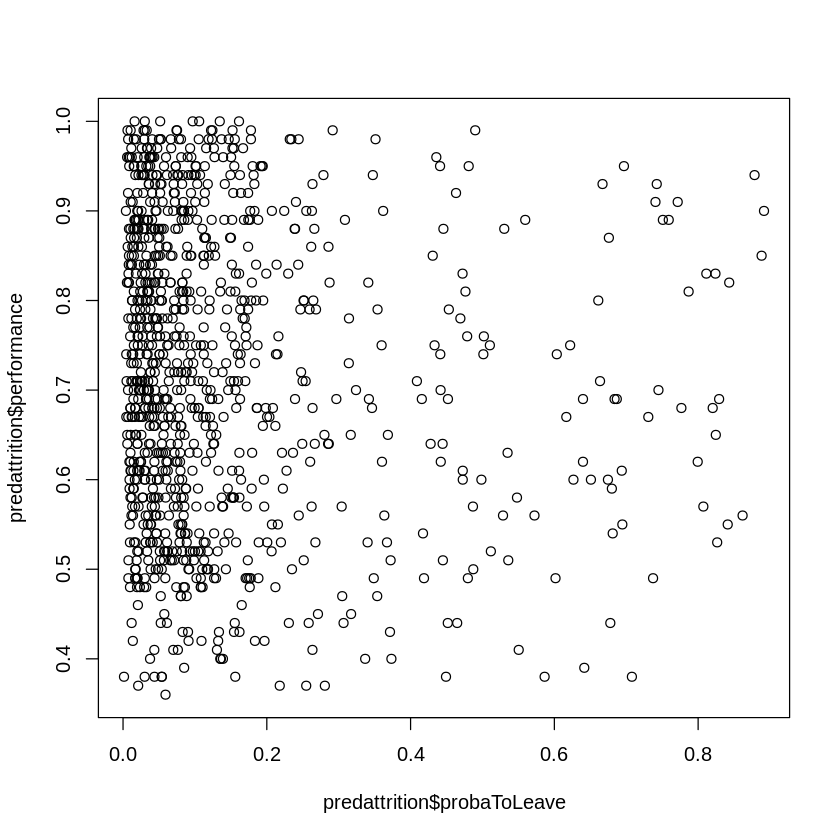

In [28]:
plot(predattrition$probaToLeave,predattrition$performance)

In [29]:
predattrition$priority=predattrition$performance*predattrition$probaToLeave
View(predattrition)

ERROR: Error in View(predattrition): ‘View()’ not yet supported in the Jupyter R kernel


In [30]:
orderpredattrition=predattrition[order(predattrition$priority,decreasing = TRUE),]
View(orderpredattrition)


ERROR: Error in View(orderpredattrition): ‘View()’ not yet supported in the Jupyter R kernel


#        EXAMPLE N°3 - PREDICTIVE MAINTENANCE       #

In [1]:
# Let's load the data
data=read.table('DATA_4.03_MNT.csv',sep=',',header=TRUE)

In [2]:
str(data) # The str() function shows the structure of your dataset and details the type of variables that it contains

'data.frame':	1000 obs. of  7 variables:
 $ lifetime      : int  56 81 60 86 34 30 68 65 23 81 ...
 $ broken        : int  0 1 0 1 0 0 0 1 0 1 ...
 $ pressureInd   : num  92.2 72.1 96.3 94.4 97.8 ...
 $ moistureInd   : num  104.2 103.1 77.8 108.5 99.4 ...
 $ temperatureInd: num  96.5 87.3 112.2 72 103.8 ...
 $ team          : Factor w/ 3 levels "TeamA","TeamB",..: 1 3 1 3 2 1 2 2 2 3 ...
 $ provider      : Factor w/ 4 levels "Provider1","Provider2",..: 4 4 1 2 1 1 2 3 2 4 ...


In [3]:
summary(data) # The summary() function provides for each variable in your dataset the minimum, mean, maximum and quartiles

    lifetime        broken       pressureInd      moistureInd    
 Min.   : 1.0   Min.   :0.000   Min.   : 33.48   Min.   : 58.55  
 1st Qu.:34.0   1st Qu.:0.000   1st Qu.: 85.56   1st Qu.: 92.77  
 Median :60.0   Median :0.000   Median : 97.22   Median : 99.43  
 Mean   :55.2   Mean   :0.397   Mean   : 98.60   Mean   : 99.38  
 3rd Qu.:80.0   3rd Qu.:1.000   3rd Qu.:112.25   3rd Qu.:106.12  
 Max.   :93.0   Max.   :1.000   Max.   :173.28   Max.   :128.60  
 temperatureInd      team          provider  
 Min.   : 42.28   TeamA:336   Provider1:254  
 1st Qu.: 87.68   TeamB:356   Provider2:266  
 Median :100.59   TeamC:308   Provider3:242  
 Mean   :100.63               Provider4:238  
 3rd Qu.:113.66                              
 Max.   :172.54                              

In [4]:
linregmodel = lm(lifetime~.-broken,data=data)  # Build a linear regression model

In [5]:
summary(linregmodel) # The summary() function shows the output of your model


Call:
lm(formula = lifetime ~ . - broken, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.388 -21.788   8.051  21.112  34.891 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       59.3732039 10.3412622   5.741 1.25e-08 ***
pressureInd       -0.0031500  0.0416461  -0.076   0.9397    
moistureInd       -0.0173023  0.0830046  -0.208   0.8349    
temperatureInd    -0.0002769  0.0421330  -0.007   0.9948    
teamTeamB          1.5491323  1.9983947   0.775   0.4384    
teamTeamC         -3.4280411  2.0670679  -1.658   0.0976 .  
providerProvider2  0.8835691  2.2944030   0.385   0.7002    
providerProvider3 -9.4858216  2.3490911  -4.038 5.80e-05 ***
providerProvider4  1.8679357  2.3616268   0.791   0.4292    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.13 on 991 degrees of freedom
Multiple R-squared:  0.0339,	Adjusted R-squared:  0.0261 
F-statistic: 4.346 on 8 and 991 DF,  p-val

In [6]:
# install.packages("survival") # Install the survival package to your computer

In [7]:
library(survival) # Load the survival package

In [8]:
dependantvars = Surv(data$lifetime, data$broken) # choose the dependant variables to be used in the survival regression model with the Surv() function

In [22]:
dependantvars

   [1] 56+ 81  60+ 86  34+ 30+ 68+ 65  23+ 81  38+ 29+ 65  65  82  80  48+ 80 
  [19] 92  88  74  65+ 61+ 35+ 26+ 63+ 88  79  53+ 73  60  13+ 34+ 36+ 80  65 
  [37] 31+ 74  25+ 58+ 80  65  19+ 60  84+ 13+ 12+ 15+ 26+ 43+ 80  65   1+ 34+
  [55] 80  12+ 92  82  65  20+ 16+  3+ 18+  7+ 47+ 23+ 39+ 48+ 57+ 68+ 18+  1+
  [73] 81  65+  4+ 24+ 74  74  16+ 88+ 28+ 92  49+ 39+ 18+ 80+ 81  65  79  19+
  [91] 58+ 76+ 92  92  52+ 29+ 65   8+ 53+ 40+ 46+  5+ 41+ 12+ 65  80  93  63+
 [109] 77+ 65  92  62+ 52+ 85  92  92  88  80  58+ 55+ 33+ 13+ 34+ 85  65  80+
 [127] 41+ 65  65  43+ 80  80  55+ 88  17+ 86   3+ 81+ 93  65  55+ 25+ 93  82 
 [145] 13+ 19+ 86  60  81  80  93  43+ 63+ 45+ 93  77+  9+ 60  62+ 82  29+ 65 
 [163] 49+ 72+ 16+ 56+ 80  40+ 57+ 88  93  20+ 12+ 57+ 65  50+ 42+ 49+ 65+ 65 
 [181] 44+ 92   9+ 48+ 49+ 65  36+ 60  81+ 24+ 60  65  63+ 93  92  65  28+ 25+
 [199] 74  20+ 93  57+ 46+ 60  56+  1+ 76+ 31+ 54+  1+ 64+ 53+ 62+ 12+ 76+ 53+
 [217] 86  29+ 80  65  60+ 65  88+ 47+  3+ 65  19+ 6

In [9]:
survreg = survreg(dependantvars~pressureInd+moistureInd+temperatureInd+team+provider, dist="gaussian",data=data) # Create your survival regression model

In [10]:
summary(survreg)  # The summary() function shows the output of your model


Call:
survreg(formula = dependantvars ~ pressureInd + moistureInd + 
    temperatureInd + team + provider, data = data, dist = "gaussian")
                      Value Std. Error       z      p
(Intercept)        8.04e+01   2.94e-01  273.57 <2e-16
pressureInd       -7.14e-04   1.22e-03   -0.59  0.557
moistureInd        6.01e-03   2.40e-03    2.51  0.012
temperatureInd    -1.04e-02   1.21e-03   -8.59 <2e-16
teamTeamB         -5.67e-02   5.88e-02   -0.96  0.335
teamTeamC         -6.22e+00   6.13e-02 -101.39 <2e-16
providerProvider2  1.25e+01   6.67e-02  187.46 <2e-16
providerProvider3 -1.44e+01   6.27e-02 -229.24 <2e-16
providerProvider4  7.92e+00   7.06e-02  112.23 <2e-16
Log(scale)        -7.43e-01   3.54e-02  -21.00 <2e-16

Scale= 0.476 

Gaussian distribution
Loglik(model)= -270.1   Loglik(intercept only)= -1557
	Chisq= 2573.75 on 8 degrees of freedom, p= 0 
Number of Newton-Raphson Iterations: 12 
n= 1000 


In [11]:
Ebreak=predict(survreg, newdata=data, type="quantile", p=.5) # Make predictions based on the model. Here we estimate the median lifetime as the expected moment of "death"

In [19]:
Forecast=data.frame(Ebreak) # Create a dataframe to store the ouput of Ebreak
Forecast

,Ebreak
,<dbl>
1,87.82547
2,81.71139
3,79.58070
4,86.46185
5,79.74085
6,80.04827
7,91.74787
8,65.37599
9,92.42379


In [20]:
Forecast$lifetime=data$lifetime  # Add a column in the Forecast dataframe indicating the lifetime of the piece
Forecast$broken=data$broken # Add a column in the Forecast dataframe indicating whether or not the piece is broken
Forecast$RemainingLT=Forecast$Ebreak-data$lifetime # Computed Expected Remaining Lifetime

In [21]:
# View(Forecast) # View the complete Forecast dataframe
Forecast

,Ebreak,lifetime,broken,RemainingLT
,<dbl>,<int>,<int>,<dbl>
1,87.82547,56,0,31.82546675
2,81.71139,81,1,0.71138996
3,79.58070,60,0,19.58069687
4,86.46185,86,1,0.46185472
5,79.74085,34,0,45.74084554
6,80.04827,30,0,50.04826732
7,91.74787,68,0,23.74787197
8,65.37599,65,1,0.37599475
9,92.42379,23,0,69.42378630


In [18]:
Forecast=Forecast[order(Forecast$RemainingLT),] # Order the elements by Expected Remaining Lifetime
ActionsPriority=Forecast[Forecast$broken==0,] # And keep only those who are not broken yet
# View(ActionsPriority) # View the output and take actions!
ActionsPriority

,Ebreak,lifetime,broken,RemainingLT
,<dbl>,<int>,<int>,<dbl>
80,87.81934,88,0,-0.1806637
920,65.39920,65,0,0.3992047
138,81.62875,81,0,0.6287524
455,87.79644,87,0,0.7964376
917,85.91101,85,0,0.9110116
414,81.97309,81,0,0.9730926
563,85.97717,85,0,0.9771675
461,59.23558,58,0,1.2355788
417,59.24155,58,0,1.2415496


In [16]:
ActionsPriority

,Ebreak,lifetime,broken,RemainingLT
,<dbl>,<int>,<int>,<dbl>
80,87.81934,88,0,-0.1806637
920,65.39920,65,0,0.3992047
138,81.62875,81,0,0.6287524
455,87.79644,87,0,0.7964376
917,85.91101,85,0,0.9110116
414,81.97309,81,0,0.9730926
563,85.97717,85,0,0.9771675
461,59.23558,58,0,1.2355788
417,59.24155,58,0,1.2415496


#        EXAMPLE N°4 - SEASONAL SALES OF CHOCOLATES #

In [23]:
# Let's load our dataset and call it data
data=read.table('DATA_4.04_CHOC.csv',sep=',',header=TRUE) # The function read.table enables us to read flat files such as .csv files

In [ ]:
# Now let's have a look at our variables and see some summary statistics
str(data) # The str() function shows the structure of your dataset and details the type of variables that it contains
summary(data$sales) # The summary() function provides for each variable in your dataset the minimum, mean, maximum and quartiles

In [ ]:

plot(data$time,data$sales,main="Chocolate sales over time",xlab="Time (in month)",ylab="Monthly sales",ylim=c(0,max(data$sales*1.2)),type='l')
regres=lm(sales~month,data=data) # Build a linear regression model
summary(regres)

In [ ]:
# Boxplots:
plot(data$month,data$sales,main="Chocolate sales by month",xlab="Month",ylab="Monthly sales",ylim=c(0,max(data$sales*1.2)))

In [ ]:
# Recovery thanks to the model:
plot(data$time,data$sales,main="Chocolate sales over time",xlab="Time (in month)",ylab="Monthly sales",ylim=c(0,max(data$sales)*1.2),type='l')
lines(data$time,regres$fitted.values,type='l',col='blue',lty=2)
legend("topleft",c("Actual sales","Sales by the model"),lty=c(1,2),col=c('black','blue'))